# 14 Linear Algebra: String Problem — Students (2)
## Motivating problem: Two masses on three strings
Two masses $M_1$ and $M_2$ are hung from a horizontal rod with length $L$ in such a way that a rope of length $L_1$ connects the left end of the rod to $M_1$, a rope of length $L_2$ connects $M_1$ and $M_2$, and a rope of length $L_3$ connects $M_2$ to the right end of the rod. The system is at rest (in equilibrium under gravity).

![Schematic of the 1 rod/2 masses/3 strings problem.](1rod2masses3strings.svg)

Find the angles that the ropes make with the rod and the tension forces in the ropes.

## Theoretical background
Treat $\sin\theta_i$ and $\cos\theta_i$ together with $T_i$, $1\leq i \leq 3$, as unknowns that have to simultaneously fulfill the nine equations
\begin{align}
-T_1 \cos\theta_1 + T_2\cos\theta_2 &= 0\\
 T_1 \sin\theta_1 - T_2\sin\theta_2 - W_1 &= 0\\
                   -T_2\cos\theta_2 + T_3\cos\theta_3 &= 0\\
                    T_2\sin\theta_2 + T_3\sin\theta_3 - W_2 &= 0\\
 L_1\cos\theta_1 + L_2\cos\theta_2 + L_3\cos\theta_3 - L &= 0\\
-L_1\sin\theta_1 -L_2\sin\theta_2 + L_3\sin\theta_3  &= 0\\
\sin^2\theta_1 + \cos^2\theta_1 - 1 &= 0\\
\sin^2\theta_2 + \cos^2\theta_2 - 1 &= 0\\
\sin^2\theta_3 + \cos^2\theta_3 - 1 &= 0
\end{align}

Consider the nine equations a vector function $\mathbf{f}$ that takes a 9-vector $\mathbf{x}$ of the unknowns as argument:
\begin{align}
\mathbf{f}(\mathbf{x}) &= 0\\
\mathbf{x} &= \left(\begin{array}{c}
x_0 \\ x_1 \\ x_2 \\ 
x_3 \\ x_4 \\ x_5 \\ 
x_6 \\ x_7 \\ x_8
\end{array}\right) 
 =
\left(\begin{array}{c}
\sin\theta_1 \\ \sin\theta_2 \\ \sin\theta_3 \\
\cos\theta_1 \\ \cos\theta_2 \\ \cos\theta_3 \\
T_1 \\ T_2 \\ T_3
\end{array}\right) \\
\mathbf{L} &= \left(\begin{array}{c}
L \\ L_1 \\ L_2 \\ L_3
\end{array}\right), \quad
\mathbf{W} = \left(\begin{array}{c}
W_1 \\ W_2
\end{array}\right)
\end{align}

Solve with generalized Newton-Raphson:
$$
\mathsf{J}(\mathbf{x}) \Delta\mathbf{x} = -\mathbf{f}(\mathbf{x})
$$
and 
$$
\mathbf{x} \leftarrow \mathbf{x} + \Delta\mathbf{x}.
$$

## Problem setup
Set the problem parameters and the objective function $\mathbf{f}(\mathbf{x})$

In [1]:
import numpy as np

# problem parameters
W = np.array([10, 20])
L = np.array([8, 3, 4, 4])

def f_2masses(x, L, W):
    return np.array([
            -x[6]*x[3] + x[7]*x[4],
             x[6]*x[0] - x[7]*x[1] - W[0],
            -x[7]*x[4] + x[8]*x[5],
             x[7]*x[1] + x[8]*x[2] - W[1],
             L[1]*x[3] + L[2]*x[4] + L[3]*x[5] - L[0],
            -L[1]*x[0] - L[2]*x[1] + L[3]*x[2],
            x[0]**2 + x[3]**2 - 1,
            x[1]**2 + x[4]**2 - 1,
            x[2]**2 + x[5]**2 - 1,
        ])

def fLW(x):
    return f_2masses(x, L, W)

### Initial values
Guess some initial values (they don't have to fullfil the equations!):

In [2]:
# initial parameters
theta0 = np.deg2rad([45, 45, 90])
T0 = np.array([1, 1, 2])
x0 = np.concatenate([np.sin(theta0), np.cos(theta0), T0])

In [3]:
x0

array([  7.07106781e-01,   7.07106781e-01,   1.00000000e+00,
         7.07106781e-01,   7.07106781e-01,   6.12323400e-17,
         1.00000000e+00,   1.00000000e+00,   2.00000000e+00])

In [4]:
f_2masses(x0, L, W)

array([  0.        , -10.        ,  -0.70710678, -17.29289322,
        -3.05025253,  -0.94974747,   0.        ,   0.        ,   0.        ])

### Visualization
Plot the positions of the 2 masses and the 3 strings for any solution vector $\mathbf{x}$:

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def plot_2masses(x, L, W, **kwargs):
    """Plot 2 mass/3 string problem for parameter vector x and parameters L and W"""
    
    kwargs.setdefault('linestyle', '-')
    kwargs.setdefault('marker', 'o')
    kwargs.setdefault('linewidth', 1)
    
    r0 = np.array([0, 0])
    r1 = r0 + np.array([L[0], 0])
    rod = np.transpose([r0, r1])
    
    L1 = r0 + np.array([L[1]*x[3], -L[1]*x[0]])
    L2 = L1 + np.array([L[2]*x[4], -L[2]*x[1]])
    L3 = L2 + np.array([L[3]*x[5], L[3]*x[2]])
    strings = np.transpose([r0, L1, L2, L3])
    
    ax = plt.subplot(111)
    ax.plot(rod[0], rod[1], color="black", marker="d", linewidth=4)
    ax.plot(strings[0], strings[1], **kwargs)
    ax.set_aspect(1)
    return ax

What does the initial guess look like?

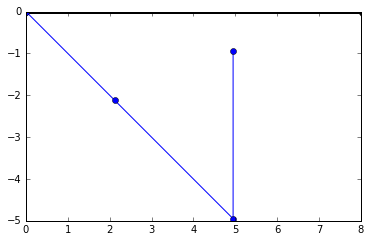

In [7]:
plot_2masses(x0, L, W)

## Jacobian 
Write a function `Jacobian(f, x, h=1e-5)` that computes the Jacobian matrix numerically (use the central difference algorithm).

In [8]:
def Jacobian(f, x, h=1e-5):
    """df_i/dx_j with central difference (f(x+h/2)-f(x-h/2))/h"""
    J = np.zeros((len(f(x)), len(x)), dtype=np.float64)
    hvec = np.zeros_like(x, dtype=np.float64)
    for j in range(len(x)):
        hvec *= 0
        hvec[j] = 0.5*h
        J[:, j] = (f(x + hvec) - f(x - hvec))/h
    return J

Test Jacobian on 
$$
\mathbf{f}(\mathbf{x}) = \left( \begin{array}{c}
  x_0^2 - x_1 \\ x_0
  \end{array}\right)
$$
with analytical result
$$
\mathsf{J} = \frac{\partial f_i}{\partial x_j} =
\left( \begin{array}{cc}
  2 x_0 & -1\\
  1 & 0
\end{array}\right)
$$

In [9]:
def ftest(x):
    return np.array([
            x[0]**2 - x[1],
            x[0]
        ])
x0test = np.array([1, 0])
J = Jacobian(ftest, x0test)
print(J)

[[ 2. -1.]
 [ 1.  0.]]


Test that it also works for our starting vector:

In [10]:
Jacobian(fLW, x0)

array([[ 0.        ,  0.        ,  0.        , -1.        ,  1.        ,
         0.        , -0.70710678,  0.70710678,  0.        ],
       [ 1.        , -1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.70710678, -0.70710678,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -1.        ,
         2.        ,  0.        , -0.70710678,  0.        ],
       [ 0.        ,  1.        ,  2.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.70710678,  1.        ],
       [ 0.        ,  0.        ,  0.        ,  3.        ,  4.        ,
         4.        ,  0.        ,  0.        ,  0.        ],
       [-3.        , -4.        ,  4.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.41421356,  0.        ,  0.        ,  1.41421356,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.41421356,  0.        ,  0.        ,  1

## n-D Newton-Raphson Root Finding 
Write a function `newton_raphson(f, x, Nmax=100, tol=1e-8, h=1e-5)` to find a root for a vector function `f(x)=0`. (See also [11 Root-finding by trial-and-error](http://asu-compmethodsphysics-phy494.github.io/ASU-PHY494//2016/03/17/11_Root_finding/) and the _1D Newton-Raphson algorithm_ in [11_Root_finding.ipynb](https://github.com/ASU-CompMethodsPhysics-PHY494/PHY494-resources/blob/master/11_rootfinding/11_Root_finding.ipynb).) As a convergence criterion we demand that the length of the vector `f(x)` (the norm --- see `np.linalg.norm`) be less than the tolerance.

In [ ]:
def newton_raphson(f, x, Nmax=100, tol=1e-8, h=1e-5):
    """n-D Newton-Raphson: solves f(x) = 0.
    
    Iterate until |f(x)| < tol or nmax steps.
    """
    x = x.copy()
    
    raise NotImplementedError
    
    else:
        print("Newton-Raphson: no root found after {0} iterations (eps={1}); "
            "best guess is {2} with error {3}".format(Nmax, tol, x, fx))
    return x

### Solve 2 masses/3 strings string problem 

#### Solution 

Plot the starting configuration and the solution:

In [ ]:
plot_2masses(x0, L, W)
plot_2masses(x, L, W)

Pretty-print the solution (angles in degrees):

In [ ]:
def pretty_print(x):
    theta = np.rad2deg(np.arcsin(x[0:3]))
    tensions = x[6:]
    print("theta1 = {0[0]:.1f} \t theta2 = {0[1]:.1f} \t theta3 = {0[2]:.1f}".format(theta))
    print("T1     = {0[0]:.1f} \t T2     = {0[1]:.1f} \t T3     = {0[2]:.1f}".format(tensions))

In [ ]:
print("Starting values")
pretty_print(x0)
print()
print("Solution")
pretty_print(x)

#### Show intermediate steps
Create a new function `newton_raphson_intermediates()` based on `newton_raphson()` that returns *all* trial `x` values including the last one.

In [ ]:
def newton_raphson_intermediates(f, x, Nmax=100, tol=1e-8, h=1e-5):
    """n-D Newton-Raphson: solves f(x) = 0.
    
    Iterate until |f(x)| < tol or nmax steps.
    
    Returns all intermediates.
    """
    intermediates = []
    x = x.copy()
    
    raise NotImplementedError
    
    else:
        print("Newton-Raphson: no root found after {0} iterations (eps={1}); "
            "best guess is {2} with error {3}".format(Nmax, tol, x, fx))
    return np.array(intermediates)

Visualize the intermediate configurations:

In [ ]:
x_series = newton_raphson_intermediates(fLW, x0)

In [ ]:
ax = plt.subplot(111)
ax.set_prop_cycle("color", [plt.cm.viridis_r(i) for i in np.linspace(0, 1, len(x_series))])
for x in x_series:
    plot_2masses(x, L, W)

It's convenient to turn the above plotting code into a function that we can reuse:

In [ ]:
def plot_series(x_series, L, W):
    """Plot all N masses/strings solution vectors in x_series (N, 9) array"""
    ax = plt.subplot(111)
    ax.set_prop_cycle("color", [plt.cm.viridis_r(i) for i in np.linspace(0, 1, len(x_series))])
    for x in x_series:
        plot_2masses(x, L, W)
    return ax

## Additional work
Try different masses, e.g. M1 = M2 = 10, or M1= 0 , M2 = 10.

### M1 = M2 = 10 

In [ ]:
W_2 = np.array([10, 10])
def fLW_2(x):
    return f_2masses(x, L, W_2)

In [ ]:
x_series_2 = newton_raphson_intermediates(fLW_2, x0)
pretty_print(x_series_2[-1])

In [ ]:
plot_series(x_series_2, L, W_2)

### M1 = 0, M2 = 10 
What do you expect to see?

### Vary lengths...
Try to predict what the geometry will look like for different lengths and masses and then do the numerical calculation.